<a href="https://colab.research.google.com/github/lnrdmnc/Model-prediction-for-terrorist-attacks-IA/blob/main/Classification-Model-prediction-for-terrorist-attacks-IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificazione

## Ottenimento del dataset

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from six.moves import urllib
import seaborn as sb
from matplotlib import style
from google.colab import files
import io
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (40,20)

DOWNLOAD_ROOT="https://raw.githubusercontent.com/lnrdmnc/Model-prediction-for-terrorist-attacks-IA/main/datasets/terrorismWHR.csv"

#fetch dataset da github
def fetch_file_data1(file_url1=DOWNLOAD_ROOT, file_path1="file"):
  os.makedirs(file_path1, exist_ok=True)
  csv_path1 = os.path.join(file_path1, "dataset.csv")
  urllib.request.urlretrieve(file_url1, csv_path1)
fetch_file_data1()

#df è la variabile che contiene il dataset
df=pd.read_csv("file/dataset.csv")
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,...,Motive,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,1,3,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,2.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
1,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
2,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,3.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
3,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
4,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,NaN,112,4.677,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


## 1) DataCleaning

### 1.1) Descrizione del dataset

In [2]:
#descrizione del dataset
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,37883.000000,37883.000000,37883.000000,37686.000000,37686.000000,35866.000000,34569.000000,37883.000000,37883.000000,37883.000000,37883.000000,37883.000000,37883.000000,37883.000000,37883.000000,37883.000000
mean,2015.909326,6.298973,15.762347,26.581336,51.453513,2.689455,3.086609,106.934667,4.679841,0.771574,0.722125,0.457983,0.290111,0.112444,0.251282,2.074303
std,0.803310,3.396994,8.812607,12.954150,33.943203,9.979389,14.492417,33.797550,0.853097,0.325967,0.338333,0.192029,0.166765,0.060232,0.116041,0.585273
min,2015.000000,1.000000,1.000000,-42.884049,-123.333302,0.000000,0.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2015.000000,3.000000,8.000000,15.666816,37.762325,0.000000,0.000000,82.000000,4.194000,0.546490,0.431060,0.303350,0.164300,0.072976,0.182950,1.816570
50%,2016.000000,6.000000,16.000000,32.559761,44.371773,1.000000,0.000000,112.000000,4.575000,0.783756,0.721151,0.501180,0.249464,0.104640,0.230947,1.969940
75%,2017.000000,9.000000,23.000000,34.355630,69.565643,2.000000,3.000000,130.000000,5.194000,1.074740,0.978613,0.602370,0.406720,0.136360,0.312680,2.290353
max,2017.000000,12.000000,31.000000,65.825119,176.986756,588.000000,1500.000000,157.000000,7.537000,1.690420,1.558231,0.991110,0.659800,0.522080,0.838075,3.837720


### 1.2) Verifica valori null nel dataset

In [3]:
#verifica se ci sono dati null nel dataset
df.isnull().any()

Year                             False
Month                            False
Day                              False
Country                          False
Region                           False
city                             False
latitude                          True
longitude                         True
AttackType                       False
Killed                            True
Wounded                           True
Target                           False
Summary                          False
Group                            False
Target_type                      False
Weapon_type                      False
Motive                            True
Happiness Rank                   False
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual        

In [4]:
#verifica se ci sono dati NA nel dataset
df.isna().any()

Year                             False
Month                            False
Day                              False
Country                          False
Region                           False
city                             False
latitude                          True
longitude                         True
AttackType                       False
Killed                            True
Wounded                           True
Target                           False
Summary                          False
Group                            False
Target_type                      False
Weapon_type                      False
Motive                            True
Happiness Rank                   False
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual        

In [6]:
df.drop('Motive',axis=1,inplace=True)
df.dropna(axis='index',inplace=True)

### 1.3) Correlazione delle features

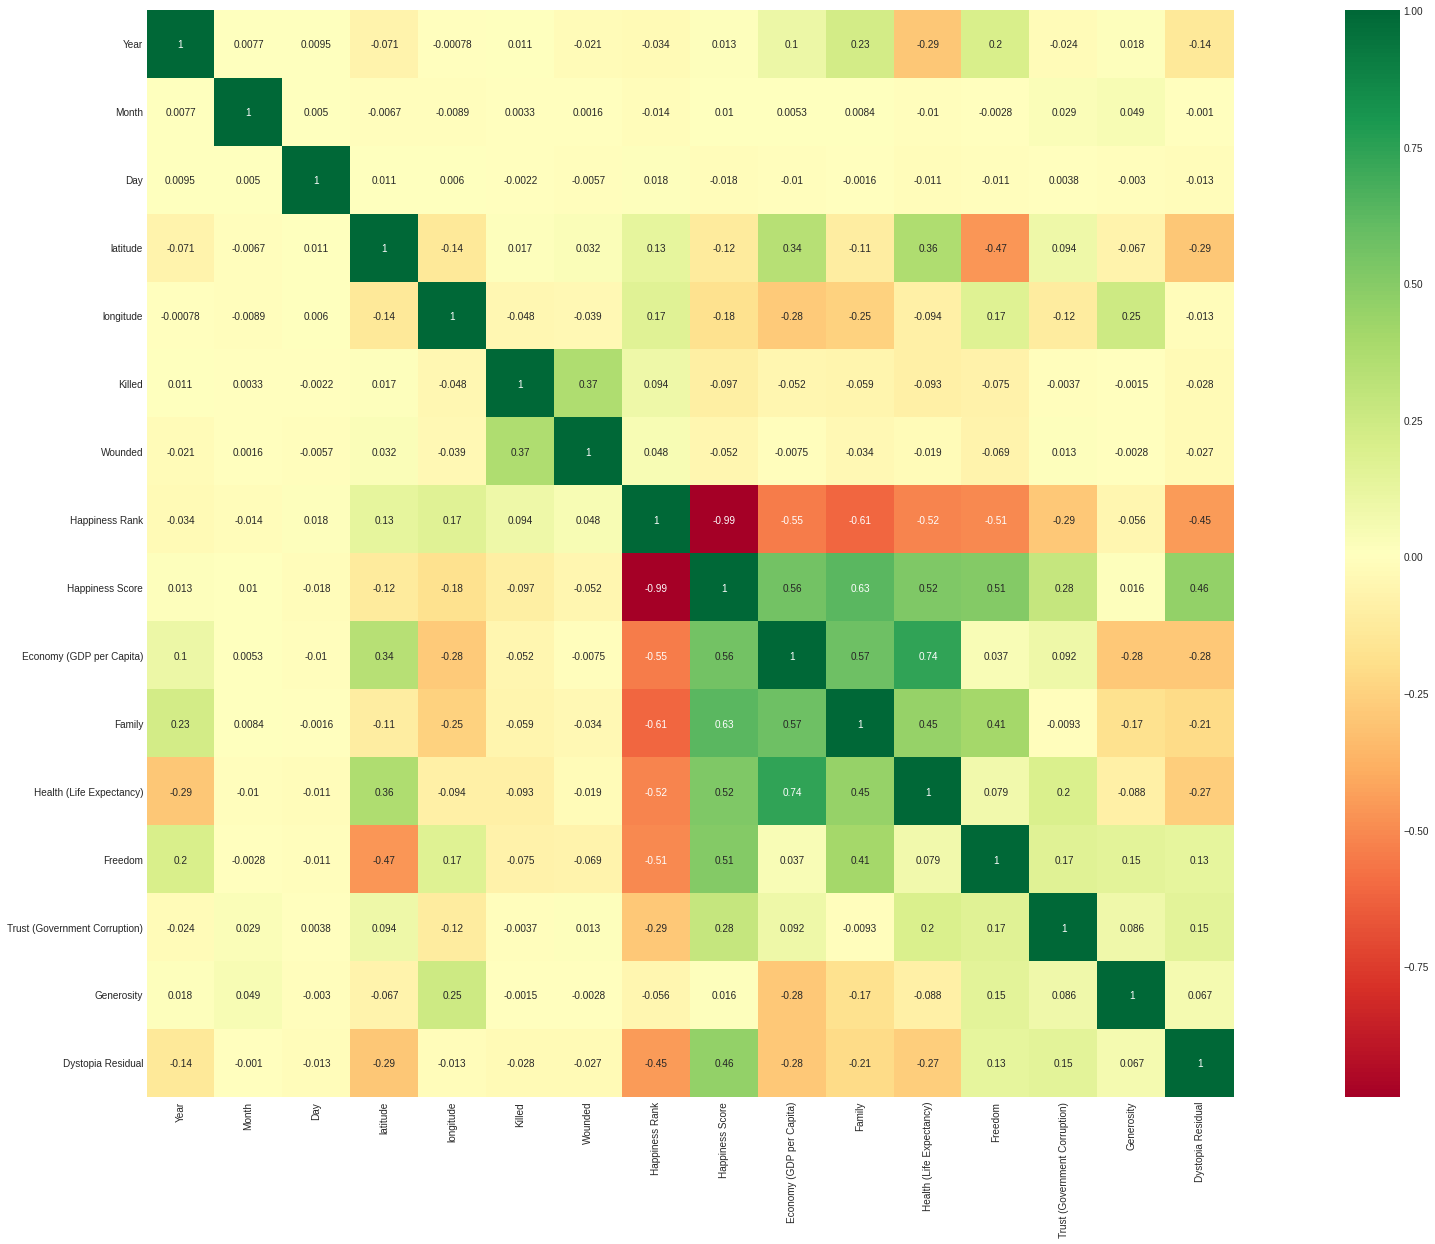

In [7]:
#dipendenze tra variabili
import seaborn as sb
sb.heatmap(df.corr(), annot=True, cmap="RdYlGn", square=True)

## 2)Divisione in Training e Test Sets, Feature Selection

### 2.1) definizione classe Metrics1

In [8]:
#oggetto che contiene le metriche
class Metrics1:
  #costruttore
  def __init__(self,precision,recall,accuracy,mcc):
    self.precision=precision
    self.recall=recall
    self.accuracy=accuracy
    self.mcc=mcc
  
  #ToString
  def __str__(self):
    return f'Metrics [precision= {self.precision} recall= {self.recall} accuracy= {self.accuracy} mcc= {self.mcc}'

### 2.2) Definizione class MetricsResultContainer

In [9]:
import numpy as np
class MetricsResultContainer:
  meanPrecision = []
  meanRecall = []
  meanAccuracy = []
  meanMcc =[]
  #costruttore
  def __init__(self,model,alg,scaler,param,metricsMean,balance):
    self.model=model
    self.alg=alg
    self.scaler=scaler
    self.param=param
    self.metricsMean=metricsMean
    self.meanPrecision = []
    self.meanRecall = []
    self.meanAccuracy = []
    self.meanMcc =[]
    self.balance=balance
  
  def printMetrics(self):
    for m in self.metricsMean:
      self.meanPrecision.append(m.precision)
      self.meanRecall.append(m.recall)
      self.meanAccuracy.append(m.accuracy)
      self.meanMcc.append(m.mcc)
    print("meanPrecision=",np.mean(self.meanPrecision))    
    print("meanRecall=",np.mean(self.meanRecall))    
    print("meanAccuracy=",np.mean(self.meanAccuracy))
    print("meanMcc=",np.mean(self.meanMcc))

### 2.3) Definizione funzione generateModel

In [16]:
import copy
from sklearn import metrics, clone
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
def generateModel(alg, scaler, model, select,balance):
  #array di metriche (precision, recall, accuracy, mcc)
  metrics1 = []
  #generazione n_split test/trainig sets
  
  for train_index, test_index in alg.split(X,y):
    clone_model = clone(model)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #feature scaling sui traing test
    X_train_z = scaler.fit_transform(X_train)
    X_test_z = scaler.transform(X_test)

    #applicazione feature selection su train_z
    X_train_z = select.fit_transform(X_train_z, y_train)
    X_test_z = select.transform(X_test_z)

    #training dell'algoritmo sui training set
    clone_model.fit(X_train_z,y_train)

    #validazione modello e applicazione predizione sui testSet
    y_pred = clone_model.predict(X_test_z)

    #calcolo metriche predizion
    cm=metrics.confusion_matrix(y_test,y_pred)
    TP, FP, TN, FN = perf_measure(cm)
    metrics1.append(Metrics1((TP/(TP+FP)),(TP/(TP+FN)),
                            ((TP+TN)/(TP+TN+FP+FN)),
                            metrics.matthews_corrcoef(y_test,y_pred)))
  return metrics1
lb=LabelEncoder()
#Scelta variabile dipendente (y) e indipendenti (X)
y=df['Happiness Rank']
X=df[['Year','Month','latitude','longitude','Killed','Wounded','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom'	,'Trust (Government Corruption)','Generosity','Dystopia Residual']]
X.insert(0,'Country',lb.fit_transform(df['Country']))
X.insert(0,'Region',lb.fit_transform(df['Region']))
X.insert(0,'AttackType',lb.fit_transform(df['AttackType']))
X.insert(0,'city',lb.fit_transform(df['city']))
X.insert(0,'Target',lb.fit_transform(df['Target']))
X.insert(0,'Group',lb.fit_transform(df['Group']))
X.insert(0,'Target_type',lb.fit_transform(df['Target_type']))
X.insert(0,'Weapon_type',lb.fit_transform(df['Weapon_type']))
#numero record nel dataset
k=len(df)
#calcolo k ideale da usare nelle tecniche di validazione
k= (k/(k*0.3))
#Kf con k gruppi
kf = KFold(n_splits=int(np.ceil(k)),random_state=42, shuffle=True)
#rKf con k gruppi, e 10 ripetizioni
rkf = RepeatedKFold(n_splits=int(np.ceil(k)), n_repeats=10, random_state=42)
#rkf con 3 gruppi e 10 ripetizioni per questioni della ram del coso
rkfRF = RepeatedKFold(n_splits=2, n_repeats=8, random_state=42)
#instanziazione algritmo per selezione dei KBest individui
select = SelectKBest(f_classif, k=4)
#risultati: array di array di metriche
metricsResults = []

###2.4) Data Balancing

In [17]:
from imblearn.under_sampling import RandomUnderSampler

#funzione per bilanciare i dati uso di undersample
def bilanciamentoDatiUnderSampling(X_train,y_train):
  undersample = RandomUnderSampler(sampling_strategy='majority')
  X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
  return X_train_under, y_train_under

In [18]:
from imblearn.over_sampling import RandomOverSampler

#funzione per bilanciare i dati uso di overfitting
def bilanciamentoDatiOverSampling(X_train,y_train):
  oversample = RandomOverSampler(random_state=42)
  X_train_over, y_train_over= oversample.fit_resample(X_train, y_train)
  return X_train_over, y_train_over

In [19]:

def perf_measure(confusionMatrix):
  meanTP = []
  meanFP = []
  meanTN = []
  meanFN = []

  #calcolo TP FP TN FN dalla matrice di confusione
  for i in range(len(confusionMatrix)):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for y in range(len(confusionMatrix)): 
      if i==y:
        TP += confusionMatrix[i][y]
      if i!=y:
        FP += confusionMatrix[y][i]
        FN += confusionMatrix[i][y]
    for j in range(len(confusionMatrix)):
      for x in range(len(confusionMatrix)):
        if j!=i and x!= i:
          TN += confusionMatrix[j][x]
    meanTP.append(TP)
    meanFP.append(FP)
    meanTN.append(TN)
    meanFN.append(FN)
  return(np.mean(meanTP), np.mean(meanFP), np.mean(meanTN), np.mean(meanFN))

## 3) Model testing

### 3.1) NaiveBayes

#### 3.1.1) Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

print("Gaussian Naive Bayes - ZScore Normalization - KF-Under Sampler")
#Gaussian K-Fold e Z-score Under
m = MetricsResultContainer("Gaussian Naive Bayes","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  GaussianNB(), select,bilanciamentoDatiUnderSampling),"underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian Repeated K-Fold e Z-score Under
print("\nGaussian Naive Bayes - ZScore Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  GaussianNB(), select,bilanciamentoDatiUnderSampling),"underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian K-Fold e MinMax Under
print("\nGaussian Naive Bayes - MinMax Normalization - KF- Under Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  GaussianNB(), select,bilanciamentoDatiUnderSampling),"underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian Repeated K-Fold e MinMax Under
print("\nGaussian Naive Bayes - MinMax Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  GaussianNB(), select,bilanciamentoDatiUnderSampling),"underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian K-Fold e RobustScaler Under
print("\nGaussian Naive Bayes - RobustScaler Normalization - KF- Under Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  GaussianNB(), select,bilanciamentoDatiUnderSampling),"underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian Repeated K-Fold e RobustScaler Under
print("\nGaussian Naive Bayes - RobustScaler Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), GaussianNB(), select,bilanciamentoDatiUnderSampling),"underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian K-Fold e Z-score Over
print("\nGaussian Naive Bayes - ZScore Normalization - KF-Over Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  GaussianNB(), select,bilanciamentoDatiOverSampling),"overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian Repeated K-Fold e Z-score Over
print("\nGaussian Naive Bayes - ZScore Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  GaussianNB(), select,bilanciamentoDatiOverSampling),"overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian K-Fold e MinMax Over
print("\nGaussian Naive Bayes - MinMax Normalization - KF- Over Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  GaussianNB(), select,bilanciamentoDatiOverSampling),"overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian Repeated K-Fold e MinMax Over
print("\nGaussian Naive Bayes - MinMax Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  GaussianNB(), select,bilanciamentoDatiOverSampling),"overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian K-Fold e RobustScaler Over
print("\nGaussian Naive Bayes - RobustScaler Normalization - KF- Over Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  GaussianNB(), select,bilanciamentoDatiOverSampling),"overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Gaussian Repeated K-Fold e RobustScaler Over
print("\nGaussian Naive Bayes - RobustScaler Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Gaussian Naive Bayes","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), GaussianNB(), select,bilanciamentoDatiOverSampling),"overSampler"
)
metricsResults.append(m)
m.printMetrics()

Gaussian Naive Bayes - ZScore Normalization - KF-Under Sampler
meanPrecision= 0.9574462356125104
meanRecall= 0.9574462356125104
meanAccuracy= 0.999337168347974
meanMcc= 0.9552927462304279

Gaussian Naive Bayes - ZScore Normalization - RKF- Under Sampler
meanPrecision= 0.9580244544328373
meanRecall= 0.9580244544328373
meanAccuracy= 0.9993435524560408
meanMcc= 0.9559066848907453

Gaussian Naive Bayes - MinMax Normalization - KF- Under Sampler
meanPrecision= 0.9574462356125104
meanRecall= 0.9574462356125104
meanAccuracy= 0.999337168347974
meanMcc= 0.9552927462304279

Gaussian Naive Bayes - MinMax Normalization - RKF- Under Sampler
meanPrecision= 0.9580244544328373
meanRecall= 0.9580244544328373
meanAccuracy= 0.9993435524560408
meanMcc= 0.9559066848907453

Gaussian Naive Bayes - RobustScaler Normalization - KF- Under Sampler
meanPrecision= 0.9574462356125104
meanRecall= 0.9574462356125104
meanAccuracy= 0.999337168347974
meanMcc= 0.9552927462304279

Gaussian Naive Bayes - RobustScaler Norma

### 3.1.2 Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
#Bernoulli K-Fold e Z-score Under
print("Bernoulli Naive Bayes - ZScore Normalization - KF-Under Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  BernoulliNB(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli Repeated K-Fold e Z-score Under
print("\nBernoulli Naive Bayes - ZScore Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  BernoulliNB(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli K-Fold e MinMax Under
print("\nBernoulli Naive Bayes - MinMax Normalization - KF- Under Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  BernoulliNB(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli Repeated K-Fold e MinMax Under
print("\nBernoulli Naive Bayes - MinMax Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  BernoulliNB(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli K-Fold e RobustScaler Under
print("\nBernoulli Naive Bayes - RobustScaler Normalization - KF- Under Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  BernoulliNB(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli Repeated K-Fold e RobustScaler Under
print("\nBernoulli Naive Bayes - RobustScaler Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), BernoulliNB(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli K-Fold e Z-score Over
print("\nBernoulli Naive Bayes - ZScore Normalization - KF-Over Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  BernoulliNB(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli Repeated K-Fold e Z-score Over
print("\nBernoulli Naive Bayes - ZScore Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  BernoulliNB(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli K-Fold e MinMax Over
print("\nBernoulli Naive Bayes - MinMax Normalization - KF- Over Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  BernoulliNB(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli Repeated K-Fold e MinMax Over
print("\nBernoulli Naive Bayes - MinMax Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  BernoulliNB(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli K-Fold e RobustScaler Over
print("\nBernoulli Naive Bayes - RobustScaler Normalization - KF- Over Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  BernoulliNB(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Bernoulli Repeated K-Fold e RobustScaler Over
print("\nBernoulli Naive Bayes - RobustScaler Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Bernoulli Naive Bayes","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), BernoulliNB(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()

Bernoulli Naive Bayes - ZScore Normalization - KF-Under Sampler
meanPrecision= 0.3431174711704245
meanRecall= 0.3431174711704245
meanAccuracy= 0.9896722172766508
meanMcc= 0.3066437563187886

Bernoulli Naive Bayes - ZScore Normalization - RKF- Under Sampler
meanPrecision= 0.34331313065549407
meanRecall= 0.34331313065549407
meanAccuracy= 0.9896322641653225
meanMcc= 0.30640608607715475

Bernoulli Naive Bayes - MinMax Normalization - KF- Under Sampler
meanPrecision= 0.23394386326684596
meanRecall= 0.23394386326684596
meanAccuracy= 0.9879567044372779
meanMcc= 0.16966512687233584

Bernoulli Naive Bayes - MinMax Normalization - RKF- Under Sampler
meanPrecision= 0.23337125626356037
meanRecall= 0.23337125626356037
meanAccuracy= 0.9878840938942389
meanMcc= 0.16872020914743602

Bernoulli Naive Bayes - RobustScaler Normalization - KF- Under Sampler
meanPrecision= 0.42705696332111465
meanRecall= 0.42705696332111465
meanAccuracy= 0.9909921846699856
meanMcc= 0.400642728497029

Bernoulli Naive Bayes -

## 3.2 Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier K-Fold e Z-score Under
print("Decision Tree Classifier - ZScore Normalization - KF-Under Sampler")
m = MetricsResultContainer("Decision Tree Classifier","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier Repeated K-Fold e Z-score Under
print("\nDecision Tree Classifier - ZScore Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Decision Tree Classifier","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier K-Fold e MinMax Under
print("\nDecision Tree Classifier - MinMax Normalization - KF- Under Sampler")
m = MetricsResultContainer("Decision Tree Classifier","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier Repeated K-Fold e MinMax Under
print("\nDecision Tree Classifier - MinMax Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Decision Tree Classifier","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier K-Fold e RobustScaler Under
print("\nDecision Tree Classifier - RobustScaler Normalization - KF- Under Sampler")
m = MetricsResultContainer("Decision Tree Classifier","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier Repeated K-Fold e RobustScaler Under
print("\nDecision Tree Classifier - RobustScaler Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Decision Tree Classifier","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), DecisionTreeClassifier(), select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier K-Fold e Z-score Over
print("\nDecision Tree Classifier - ZScore Normalization - KF-Over Sampler")
m = MetricsResultContainer("Decision Tree Classifier","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier Repeated K-Fold e Z-score Over
print("\nDecision Tree Classifier - ZScore Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Decision Tree Classifier","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier K-Fold e MinMax Over
print("\nDecision Tree Classifier - MinMax Normalization - KF- Over Sampler")
m = MetricsResultContainer("Decision Tree Classifier","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier Repeated K-Fold e MinMax Over
print("\nDecision Tree Classifier - MinMax Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Decision Tree Classifier","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier K-Fold e RobustScaler Over
print("\nDecision Tree Classifier - RobustScaler Normalization - KF- Over Sampler")
m = MetricsResultContainer("Decision Tree Classifier","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  DecisionTreeClassifier(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Decision Tree Classifier Repeated K-Fold e RobustScaler Over
print("\nDecision Tree Classifier - RobustScaler Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Decision Tree Classifier","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), DecisionTreeClassifier(), select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()

Decision Tree Classifier - ZScore Normalization - KF-Under Sampler
meanPrecision= 0.2762777777777778
meanRecall= 0.2762777777777778
meanAccuracy= 0.9238187134502923
meanMcc= 0.21450519171088028

Decision Tree Classifier - ZScore Normalization - RKF- Under Sampler
meanPrecision= 0.2663027777777778
meanRecall= 0.2663027777777778
meanAccuracy= 0.9227687134502925
meanMcc= 0.20380304282343645

Decision Tree Classifier - MinMax Normalization - KF- Under Sampler
meanPrecision= 0.27547222222222223
meanRecall= 0.27547222222222223
meanAccuracy= 0.9237339181286548
meanMcc= 0.21364636442355422

Decision Tree Classifier - MinMax Normalization - RKF- Under Sampler
meanPrecision= 0.266575
meanRecall= 0.266575
meanAccuracy= 0.9227973684210525
meanMcc= 0.2040960398606181

Decision Tree Classifier - RobustScaler Normalization - KF- Under Sampler
meanPrecision= 0.27644444444444444
meanRecall= 0.27644444444444444
meanAccuracy= 0.9238362573099417
meanMcc= 0.2147854874693623

Decision Tree Classifier - Robu

## 3.3) VotingClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#istanziazione voting che utilizza 3 algoritmi
voting=VotingClassifier(estimators=[('dt',DecisionTreeClassifier(max_depth=4)),
                                    ('knn',KNeighborsClassifier(n_neighbors=7)),
                                    ('scv',SVC(kernel="rbf",probability=True))],
                        voting="hard")

#Voting Classifier K-Fold e Z-score Under
print("Voting Classifier - ZScore Normalization - KF-Under Sampler")
m = MetricsResultContainer("Voting Classifier","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  voting, select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier Repeated K-Fold e Z-score Under
print("\nVoting Classifier - ZScore Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Voting Classifier","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  voting, select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier K-Fold e MinMax Under
print("\nVoting Classifier - MinMax Normalization - KF- Under Sampler")
m = MetricsResultContainer("Voting Classifier","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  voting, select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier Repeated K-Fold e MinMax Under
print("\nVoting Classifier - MinMax Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Voting Classifier","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  voting, select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier K-Fold e RobustScaler Under
print("\nVoting Classifier - RobustScaler Normalization - KF- Under Sampler")
m = MetricsResultContainer("Voting Classifier","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  voting, select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier Repeated K-Fold e RobustScaler Under
print("\nVoting Classifier - RobustScaler Normalization - RKF- Under Sampler")
m = MetricsResultContainer("Voting Classifier","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), voting, select,bilanciamentoDatiUnderSampling), "underSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier K-Fold e Z-score Over
print("\nVoting Classifier - ZScore Normalization - KF-Over Sampler")
m = MetricsResultContainer("Voting Classifier","KF","ZScore","Default",
  generateModel(kf, StandardScaler(),  voting, select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier Repeated K-Fold e Z-score Over
print("\nVoting Classifier - ZScore Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Voting Classifier","RKF","ZScore","Default",
  generateModel(rkf, StandardScaler(),  voting, select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier K-Fold e MinMax Over
print("\nVoting Classifier - MinMax Normalization - KF- Over Sampler")
m = MetricsResultContainer("Voting Classifier","KF","MinMax","Default",
  generateModel(kf, MinMaxScaler(),  voting, select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier Repeated K-Fold e MinMax Over
print("\nVoting Classifier - MinMax Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Voting Classifier","RKF","MinMax","Default",
  generateModel(rkf, MinMaxScaler(),  voting, select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier K-Fold e RobustScaler Over
print("\nVoting Classifier - RobustScaler Normalization - KF- Over Sampler")
m = MetricsResultContainer("Voting Classifier","KF","RobustScaler","Default",
  generateModel(kf, RobustScaler(),  voting, select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()
#Voting Classifier Repeated K-Fold e RobustScaler Over
print("\nVoting Classifier - RobustScaler Normalization - RKF- Over Sampler")
m = MetricsResultContainer("Voting Classifier","RKF","RobustScaler","Default",
  generateModel(rkf, RobustScaler(), voting, select,bilanciamentoDatiOverSampling), "overSampler"
)
metricsResults.append(m)
m.printMetrics()


Voting Classifier - ZScore Normalization - KF-Under Sampler
meanPrecision= 0.28411111111111115
meanRecall= 0.28411111111111115
meanAccuracy= 0.9246432748538012
meanMcc= 0.21622401558444643

Voting Classifier - ZScore Normalization - RKF- Under Sampler
meanPrecision= 0.27729166666666666
meanRecall= 0.27729166666666666
meanAccuracy= 0.9239254385964912
meanMcc= 0.20829071768248872

Voting Classifier - MinMax Normalization - KF- Under Sampler
meanPrecision= 0.27752777777777776
meanRecall= 0.27752777777777776
meanAccuracy= 0.9239502923976608
meanMcc= 0.20917974183682592

Voting Classifier - MinMax Normalization - RKF- Under Sampler
